# Zillow Rent Project

## Group Members: Jingyi Huo, Linxin(Iris) Liu,  Mingjun Wang

Data Source: https://www.kaggle.com/zillow/rent-index

"The Zillow Rent Index is the median estimated monthly rental price for a given area, and covers multifamily, single family, condominium, and cooperative homes in Zillow’s database, regardless of whether they are currently listed for rent. It is expressed in dollars and is seasonally adjusted. The Zillow Rent Index is published at the national, state, metro, county, city, neighborhood, and zip code levels."

## Our Focus and Target

1. Firstly we want to conduct an Exloratory Data Analysis on both the price and the price per square feet across the Unites States. Our target in this part is to provide data visualization to get some general information. 

2. Secondly we want to use the the data in price.csv to predict the price of rent in the Februay 2017. In order to do so, we are going to let y be column of January 2017 and x be the rest of colunms.

## Report Structure


1. Import the library
2. Exploratory Data Analysis
3. Prediction for price of Jan 2017, using different models
4. Prediction for price per square feet of Jan 2017, using different models

# Section 1. Import the Library

In [1]:
# Import packages
import numpy as np
import pandas as pd
from pandas.api.types import is_string_dtype,is_numeric_dtype
import joblib 
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import cross_val_score


#Import gridsearch and knn
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

#Import randomforest
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


#Import DNN
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
%matplotlib inline


# Section 2. Explore Data Analysis with Data Visualization

Reference: 
https://www.kaggle.com/konohayui/zillow-rent-eda
https://www.kaggle.com/piyras23/eda-on-zillow-s-rent-index

### import price.csv

In [2]:
# import the price dataset for eda and read the top 5 lines
price_eda=pd.read_csv('./price.csv')
price_eda.head(5)

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,6181,New York,New York,Queens,NY,1,NaN,NaN,NaN,NaN,...,2334,2339,2345,2344,2336,2324,2318,2321,2321,2322
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,2184.0,2184.0,2183.0,2188.0,...,2637,2662,2687,2704,2716,2723,2731,2740,2748,2753
2,17426,Chicago,Chicago,Cook,IL,3,1563.0,1555.0,1547.0,1537.0,...,1684,1686,1687,1685,1681,1675,1668,1656,1644,1632
3,39051,Houston,Houston,Harris,TX,4,1198.0,1199.0,1199.0,1200.0,...,1444,1446,1446,1443,1440,1438,1437,1437,1435,1430
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,1092.0,1099.0,1094.0,1087.0,...,1206,1211,1218,1222,1223,1220,1216,1211,1209,1212


In [3]:
price_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13131 entries, 0 to 13130
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City Code        13131 non-null  int64  
 1   City             13131 non-null  object 
 2   Metro            11899 non-null  object 
 3   County           13131 non-null  object 
 4   State            13131 non-null  object 
 5   Population Rank  13131 non-null  int64  
 6   November 2010    11348 non-null  float64
 7   December 2010    11348 non-null  float64
 8   January 2011     11348 non-null  float64
 9   February 2011    11500 non-null  float64
 10  March 2011       11673 non-null  float64
 11  April 2011       11722 non-null  float64
 12  May 2011         11732 non-null  float64
 13  June 2011        11732 non-null  float64
 14  July 2011        11732 non-null  float64
 15  August 2011      11732 non-null  float64
 16  September 2011   11734 non-null  float64
 17  October 2011

In [4]:
# get an overview for the price dataset
price_eda.describe()

,City Code,Population Rank,November 2010,December 2010,January 2011,February 2011,March 2011,April 2011,May 2011,June 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
count,13131.000000,13131.000000,11348.000000,11348.000000,11348.000000,11500.000000,11673.000000,11722.000000,11732.000000,11732.000000,...,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000
mean,78126.756454,6566.000000,1327.100458,1331.831953,1334.447744,1331.935217,1327.595819,1323.824518,1321.730822,1321.872826,...,1466.406519,1470.625695,1472.876856,1471.627370,1468.666667,1465.817988,1465.572157,1467.105247,1467.524636,1467.296550
std,119604.910806,3790.737527,652.531343,655.822002,653.931315,647.853483,640.168818,636.392831,633.675563,631.981504,...,813.253498,815.322324,819.417181,823.317848,825.885842,826.421670,825.621199,824.678612,821.891626,820.707579
min,3300.000000,1.000000,547.000000,539.000000,536.000000,542.000000,535.000000,533.000000,533.000000,536.000000,...,543.000000,548.000000,547.000000,544.000000,539.000000,532.000000,527.000000,518.000000,517.000000,518.000000
25%,18803.000000,3283.500000,982.000000,984.750000,986.000000,984.000000,979.000000,973.000000,971.000000,972.000000,...,1041.000000,1044.000000,1046.000000,1043.500000,1038.000000,1034.000000,1032.000000,1033.000000,1034.000000,1035.000000
50%,34678.000000,6566.000000,1195.000000,1199.000000,1201.500000,1201.000000,1201.000000,1196.000000,1194.000000,1193.000000,...,1275.000000,1277.000000,1278.000000,1276.000000,1270.000000,1268.000000,1266.000000,1267.000000,1267.000000,1264.000000
75%,51385.500000,9848.500000,1479.000000,1479.000000,1479.000000,1477.000000,1473.000000,1471.000000,1472.000000,1473.000000,...,1625.000000,1630.000000,1633.000000,1629.000000,1628.000000,1628.000000,1630.500000,1630.000000,1632.000000,1634.000000
max,737791.000000,13131.000000,18787.000000,18848.000000,19054.000000,19019.000000,18997.000000,18939.000000,19119.000000,19442.000000,...,21344.000000,20547.000000,20400.000000,20639.000000,20695.000000,20615.000000,20163.000000,19460.000000,18605.000000,17985.000000


### We get a brief description about the price.csv
1. There were 13,131 observations for different cities from Nov 2010 to Jan 2017. 
2. Each city had its unique City Code and Population Rank, belonging to different Metro, County, and State.
3. We could know the minimum rent, maximum rent, mean rent and standard deviation for each city in each month.
4. There are null values in the Metro column, and the columns from Nov 2010 to Dec 2012, but for the EDA we could ignore them firstly.

### The City with the Lowest and Highest Price in December 2016 

In [5]:
idx_min = price_eda.loc[:,"December 2016"].idxmin()
price_eda.loc[idx_min]

City Code          166526
City              Beecher
Metro               Flint
County            Genesee
State                  MI
                   ...   
September 2016        532
October 2016          527
November 2016         518
December 2016         517
January 2017          518
Name: 4083, Length: 81, dtype: object

In [6]:
idx_max = price_eda.loc[:,"December 2016"].idxmax()
price_eda.loc[idx_max]

City Code                 124901
City              Jupiter Island
Metro             Port St. Lucie
County                    Martin
State                         FL
                       ...      
September 2016             20615
October 2016               20163
November 2016              19460
December 2016              18605
January 2017               17985
Name: 12234, Length: 81, dtype: object

### import pricepersqft.csv

In [7]:
# import price per sqaure feet and read the top 5 lines
ppsft_eda = pd.read_csv('./pricepersqft.csv')
ppsft_eda.head()

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,6181,New York,New York,Queens,NY,1,NaN,NaN,NaN,NaN,...,1.806,1.810,1.816,1.824,1.828,1.836,1.844,1.858,1.866,1.872
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,1.578,1.578,1.580,1.582,...,1.990,2.004,2.018,2.026,2.032,2.038,2.042,2.048,2.056,2.064
2,17426,Chicago,Chicago,Cook,IL,3,1.244,1.248,1.254,1.254,...,1.354,1.362,1.370,1.374,1.378,1.380,1.380,1.380,1.376,1.374
3,39051,Houston,Houston,Harris,TX,4,0.788,0.784,0.784,0.786,...,0.984,0.984,0.982,0.980,0.976,0.974,0.974,0.976,0.976,0.974
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,0.854,0.858,0.858,0.858,...,0.948,0.956,0.962,0.964,0.964,0.966,0.968,0.972,0.974,0.974


In [8]:
idx_min2 = ppsft_eda.loc[:,"December 2016"].idxmin()
ppsft_eda.loc[idx_min2]

City Code              28546
City                   Elkin
Metro             Mount Airy
County                 Surry
State                     NC
                     ...    
September 2016         0.378
October 2016           0.378
November 2016          0.378
December 2016          0.378
January 2017           0.378
Name: 4312, Length: 81, dtype: object

In [9]:
idx_max2 = ppsft_eda.loc[:,"December 2016"].idxmax()
ppsft_eda.loc[idx_max2]

City Code                          4721
City                      Fisher Island
Metro             Miami-Fort Lauderdale
County                       Miami-Dade
State                                FL
                          ...          
September 2016                    6.486
October 2016                      6.476
November 2016                      6.47
December 2016                      6.44
January 2017                      6.406
Name: 11627, Length: 81, dtype: object

### The Number of Cities, Metros, and States from the Price Dataset

In [10]:
print("Number of Cities in the US:", len(price_eda["City Code"].unique()))
print("Number of Metros in the US:", len(price_eda["Metro"].unique()))
print("Number of States in the US:", len(price_eda["State"].unique()))

Number of Cities in the US: 13131
Number of Metros in the US: 702
Number of States in the US: 51


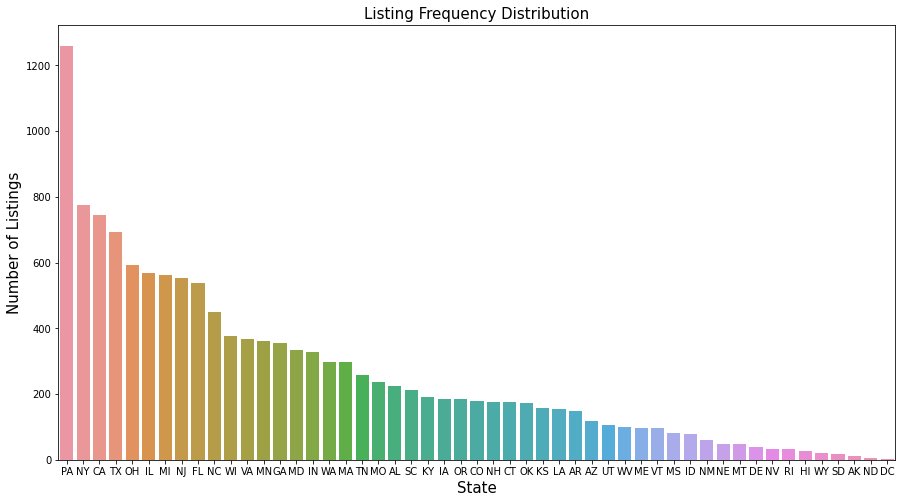

In [11]:
# plot the number of listing cities across different states
plt.figure(figsize =(15,8))
state_count = price_eda["State"].value_counts()
ax = sns.barplot(x=state_count.index, y=state_count.values, order = state_count.index)
plt.xlabel("State",fontsize=15)
plt.ylabel("Number of Listings",fontsize=15)
plt.title("Listing Frequency Distribution", fontsize=15)
plt.show()

### Listings
1. There are more than 1,200 cities listing houses in PA.
2. NY and CA had the second and the third place with about 800 listings
3. DC had only 1 city, which is itself.

### Plot the price change versus time in different states

In [12]:
# get the months as x-axis
months = price_eda.columns[6:]

In [13]:
colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired
colors = [colormap(i) for i in np.linspace(0, 1, 51)]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1116: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1116: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1116: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1116: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1116: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/s

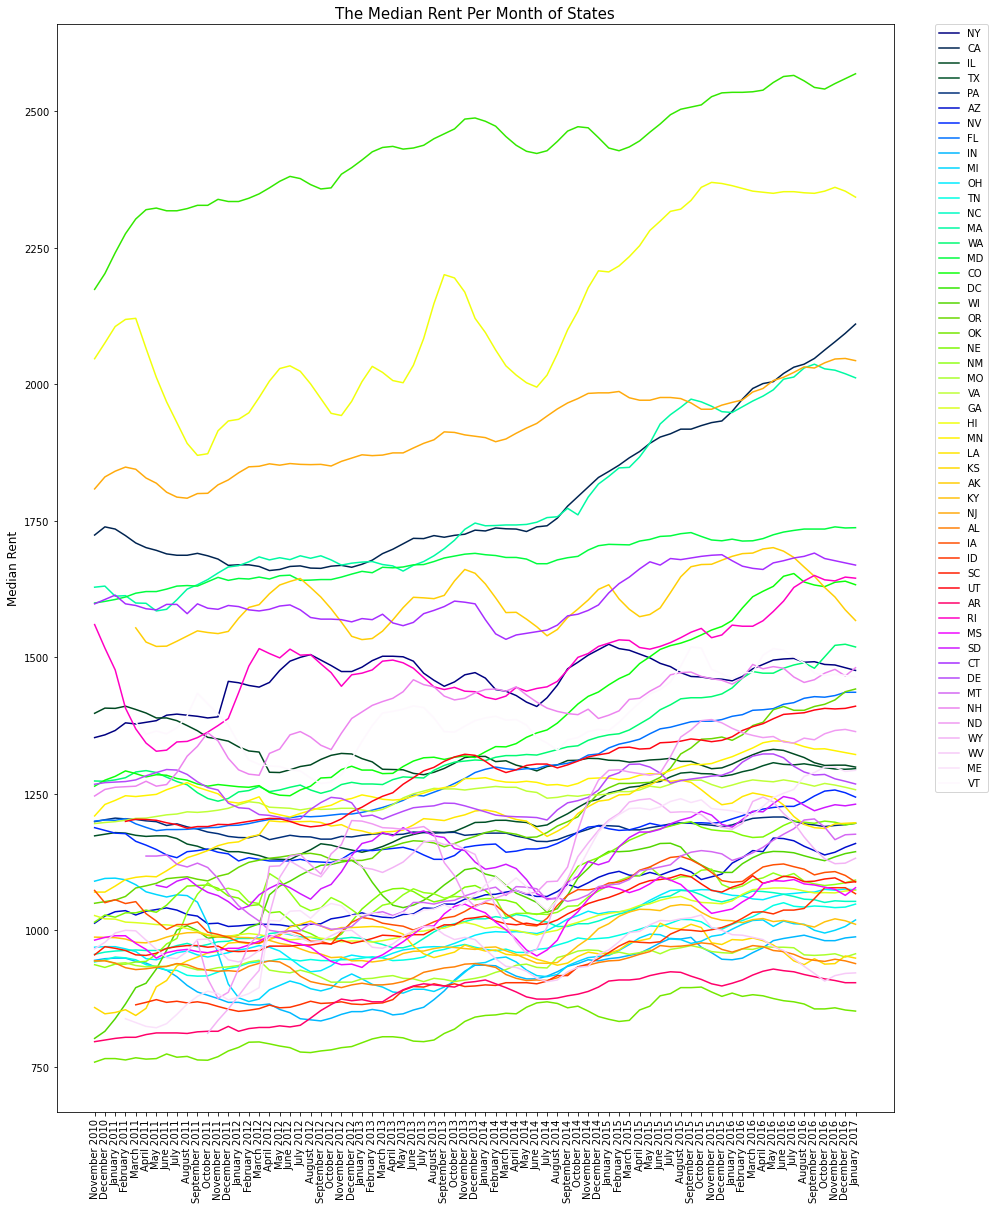

In [14]:
# plot Median Rent of States over the Unites States versus months
states = list(price_eda["State"].unique())

plt.figure(figsize =(15,20))
i = 0
for state in states:
    cur_price = price_eda[price_eda["State"] == state]
    cur_price = cur_price[months]
    plt.plot(months, np.nanmedian(cur_price, axis=0), label=state, color=colors[i])
    i = i+1
        
plt.title("The Median Rent Per Month of States", fontsize=15)
plt.xticks(rotation=90)
plt.ylabel("Median Rent", fontsize=12);
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show()

In [15]:
# get more information for Hawaii
hi = price_eda[price_eda["State"]=="HI"]

print("Number of Cities in HI:", len(hi["City"].unique()))
print("Number of Metros in HI:", len(hi["Metro"].unique()))
print("Number of County in HI:", len(hi["County"].unique()))

Number of Cities in HI: 27
Number of Metros in HI: 3
Number of County in HI: 3


### brief summary for states
1. DC had the highest meidan rent but we should notice that it only has one city. 
2. The second highest appeared in HI, which was also quite fluctuated. This may be because Hawaii is dominated by tourism and there are not many cities, so the price is relatively high, and it was obviously affected by the season.
3. Oklahoma had the lowest rent.

### Top 10 States with highest listings

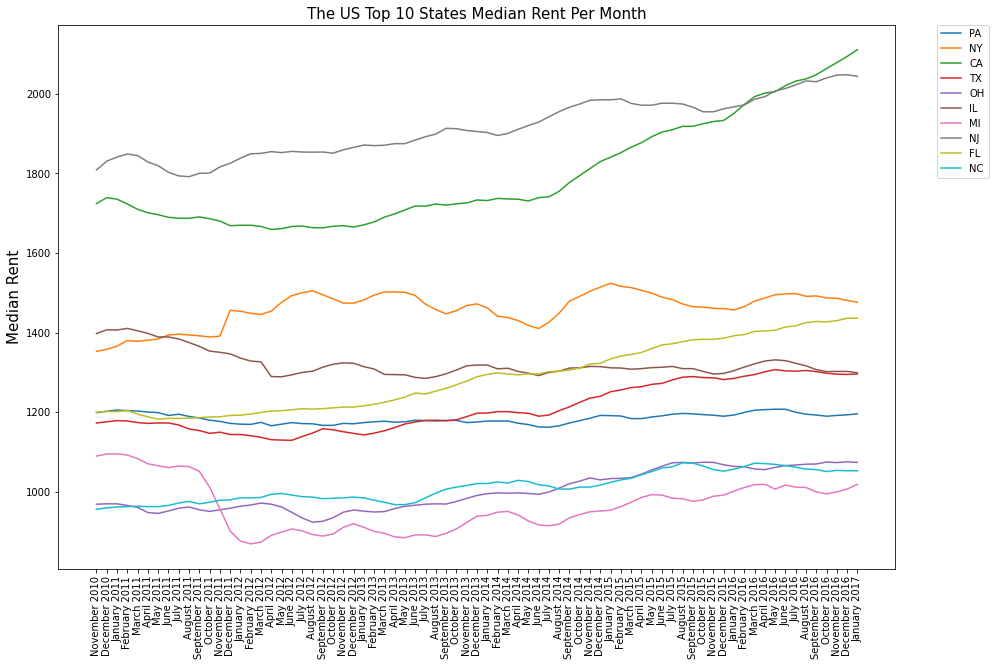

In [16]:
# Explore the top 10 states 

top10_states = state_count.index[:10]
plt.figure(figsize=(15, 10))
for state in top10_states:
    cur_price = price_eda[price_eda["State"] == state]
    cur_price = cur_price[months]
    plt.plot(months, np.nanmedian(cur_price, axis=0), label=state)

# plot the Median Rent versus months for top 10 states (by listing frequencies)
plt.title("The US Top 10 States Median Rent Per Month", fontsize=15)
plt.xticks(rotation=90)
plt.ylabel("Median Rent", fontsize=15)
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show()

### Top 30 Metros with highest listings

Number of Metros in the US:  701


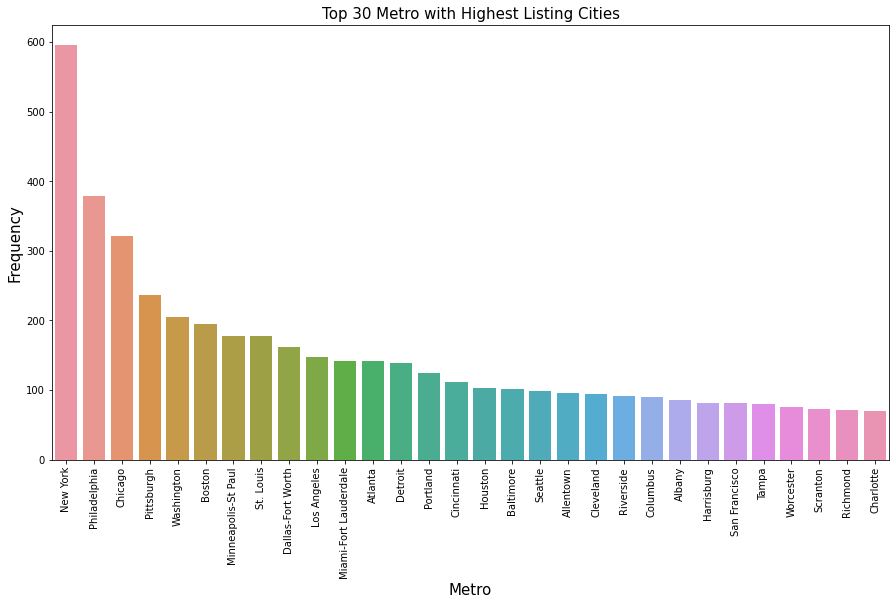

In [17]:
# plot the distribution according to listing frequency in top 10 metros 
plt.figure(figsize =(15,8))
metro_count = price_eda["Metro"].value_counts()
print("Number of Metros in the US: ", len(metro_count))
metro_count_30 = metro_count.head(30)
ax = sns.barplot(x=metro_count_30.index, y=metro_count_30.values, order = metro_count_30.index)
plt.xlabel("Metro",fontsize=15)
plt.xticks(rotation=90);
plt.ylabel("Frequency",fontsize=15)
plt.title("Top 30 Metro with Highest Listing Cities", fontsize=15)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1116: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


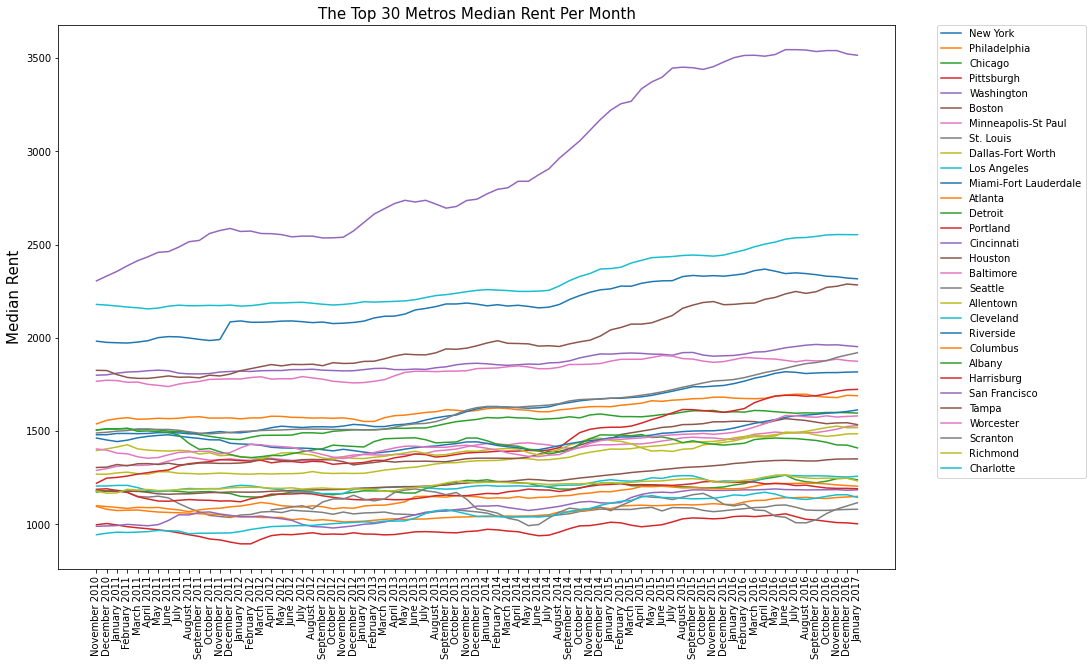

In [18]:
top30_metros = metro_count.index[:30]
plt.figure(figsize=(15, 10))
for metro in top30_metros:
    cur_price = price_eda[price_eda["Metro"] == metro]
    cur_price = cur_price[months]
    plt.plot(months, np.nanmedian(cur_price, axis=0), label=metro)

# plot the Median Rent versus months for top 10 states (by listing frequencies)
plt.title("The Top 30 Metros Median Rent Per Month", fontsize=15)
plt.xticks(rotation=90)
plt.ylabel("Median Rent", fontsize=15)
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show()
    

### Explore More about California

From the overview of the states, we noticed that starting from early 2016, the median rent in California became the state with the highest median rent among the top 10 states. And from the overview of the metros, we noticed that San Francisco became the Metro with the highest median price. 
We decided to check California and San Francisco further.

In [19]:
# Explore more about California

california = price_eda[price_eda["State"]=="CA"]
california.head(5)

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,2184.0,2184.0,2183.0,2188.0,...,2637,2662,2687,2704,2716,2723,2731,2740,2748,2753
8,54296,San Diego,San Diego,San Diego,CA,9,2070.0,2059.0,2043.0,2030.0,...,2414,2428,2438,2442,2441,2442,2449,2457,2465,2469
10,33839,San Jose,San Jose,Santa Clara,CA,11,2359.0,2367.0,2360.0,2343.0,...,3347,3368,3386,3391,3383,3363,3341,3320,3300,3286
12,20330,San Francisco,San Francisco,San Francisco,CA,13,3188.0,3207.0,3189.0,3127.0,...,4527,4519,4517,4511,4500,4488,4472,4457,4424,4382
33,18203,Fresno,Fresno,Fresno,CA,34,1260.0,1249.0,1242.0,1228.0,...,1209,1214,1216,1217,1217,1221,1226,1231,1236,1241


In [20]:
# get more information for California
print("Number of Cities in California:", len(california["City"].unique()))
print("Number of Metros in California:", len(california["Metro"].unique()))
print("Number of County in California:", len(california["County"].unique()))

Number of Cities in California: 743
Number of Metros in California: 33
Number of County in California: 52


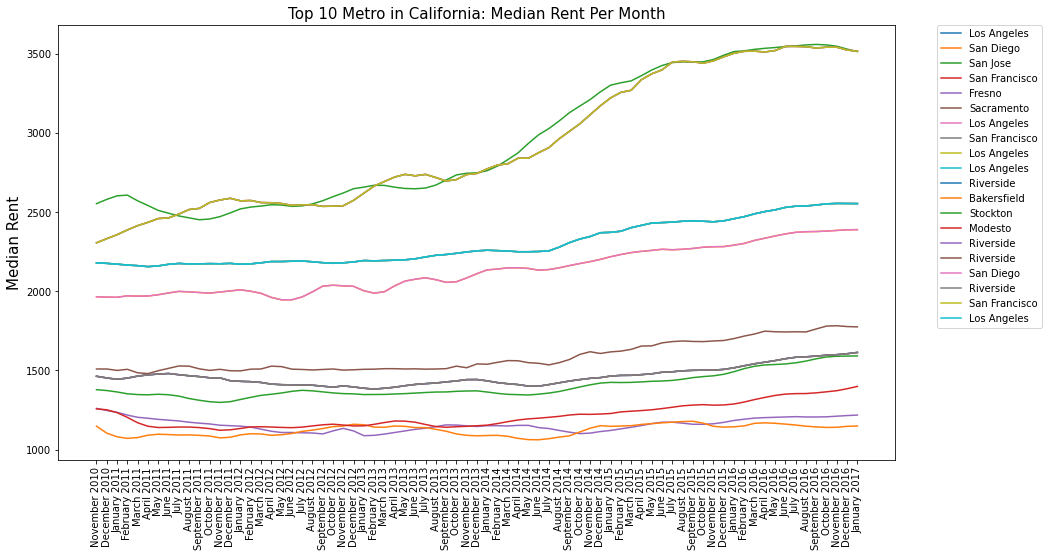

In [21]:
# Top 10 City in California by Population
plt.figure(figsize=(15,8))
for metro in range(20):
    cur_price = california[california["Metro"] == california["Metro"].iloc[metro]]
    cur_price = cur_price[months]
    plt.plot(months, np.nanmedian(cur_price, axis=0), label=california["Metro"].iloc[metro])
    
plt.title("Top 10 Metro in California: Median Rent Per Month", fontsize=15)
plt.xticks(rotation=90)
plt.ylabel("Median Rent", fontsize=15)
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show()


### What we got
1. The median price of San Francisco and San Jose obviously increased over the 5 years, which might be explained by the flourishing technology companies in Bay Area 
2. Other Metros smoothly increased.

In [22]:
# We continue to look up more details in San Francisco City

# San Francisco Price per Month

san_fran=california[california["City"]=="San Francisco"]
san_fran_price = san_fran[months]

# San Francisco price per sqft per Month

san_fran=ppsft_eda[ppsft_eda["City"]=="San Francisco"]
san_fran_ppsft = san_fran[months]

Text(0.5, 1.0, 'San Francisco Rent per Square Feet per Month')

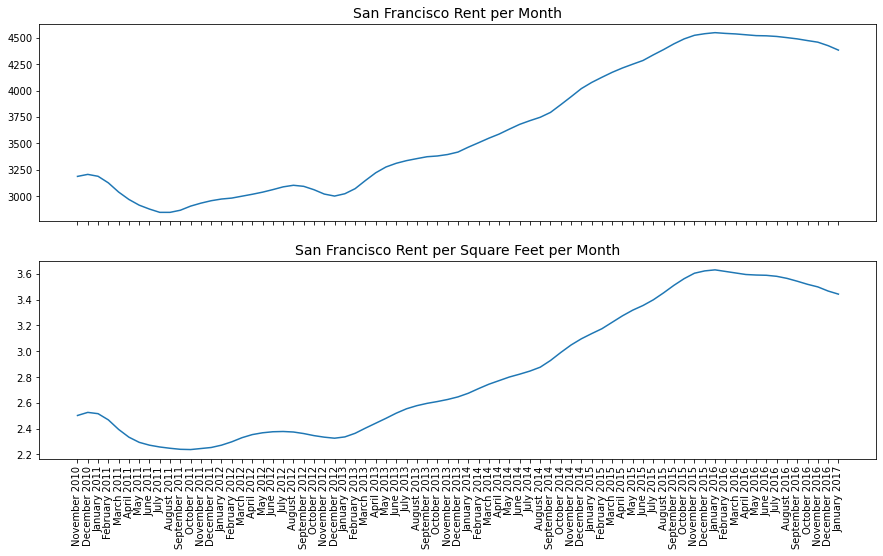

In [23]:
# plot the Median Rent and Rent per sqft versus time in San Francisco

fig, (ax_1, ax_2) = plt.subplots(2,1,sharex=True, figsize=(15,8))
plt.setp(ax_2.xaxis.get_majorticklabels(),rotation=90)
ax_1.plot(months, np.nanmedian(san_fran_price, axis=0))
ax_1.set_title("San Francisco Rent per Month", fontsize =14)
ax_2.plot(months, np.nanmedian(san_fran_ppsft, axis=0))
ax_2.set_title("San Francisco Rent per Square Feet per Month", fontsize =14)


From the Explore Data Analysis, we have a general idea about how the rent varied between 2011 and 2017, from state to state, and metro to metro. 

We are also able to provide answers to the inspiration questions for this project. 

#### 1. Which city has the highest rent? 
For Dec 2016, the city with the highest rent would be Jupiter Island in MI with the rent of $17,985.

For Dec 2016, the city with the highest rent/sqft would be Fisher Island in FL with the value of $6.406/sqft.

#### 2. Which city has the lowest rent? 
For Dec 2016, the city with the lowest rent would be Beecher in MI with the rent of $518.

For Dec 2016, the city with the highest rent/sqft would be Elkin in NC with the value of $0.378/sqft.

#### 3. Which metropolitan area is the most expensive to live in?
San Francisco

#### 4. Where have rental prices increased in the past five year?

Because for the states, the median price variation would not be the accuratest because it would be affected by many different cities. So we check the metros instead. Clearly, San Francisco had a huge increase over the 5 year by $1,000.

#### 5. Where they remained the same?
Most the metros remained the same, with slightly increase.

#### 6. Which state has the lowest cost to live in?

The state with the lowest cost would be Oklahoma, in which the median price is about $750/month.


# Section 2. Price Prediction for 2017

To testify what we have learned during this semester, we wanted to make predictions for the price and price/sqft for Jan 2017 using different models, including KNN, Linear Regression, Random Forest, and DNN. 

Since we are going to predict the price from previous data, so we decided it's a regression problem. So we choose MAE, MSE, and R-square as the output metrics to evaluate the models.

## 2-1. Prepocessing price.csv 

In order to predict the future rental price, we have to first preprocess our data. 

In [24]:
#read data 
price_df=pd.read_csv('./price.csv')     

In [25]:
#preview the price_df 
price_df.head(5)

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,6181,New York,New York,Queens,NY,1,NaN,NaN,NaN,NaN,...,2334,2339,2345,2344,2336,2324,2318,2321,2321,2322
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,2184.0,2184.0,2183.0,2188.0,...,2637,2662,2687,2704,2716,2723,2731,2740,2748,2753
2,17426,Chicago,Chicago,Cook,IL,3,1563.0,1555.0,1547.0,1537.0,...,1684,1686,1687,1685,1681,1675,1668,1656,1644,1632
3,39051,Houston,Houston,Harris,TX,4,1198.0,1199.0,1199.0,1200.0,...,1444,1446,1446,1443,1440,1438,1437,1437,1435,1430
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,1092.0,1099.0,1094.0,1087.0,...,1206,1211,1218,1222,1223,1220,1216,1211,1209,1212


In [26]:
#Split the data, because the data is too large we are only use 3000 rows for testing and prediction
def mydf_splitter(my_df,num_rows):
    return my_df[:num_rows].copy(),my_df[num_rows:]

price_df2,price_df_noinused=mydf_splitter(price_df,3000)

<AxesSubplot:xlabel='Percent missing', ylabel='Feature'>

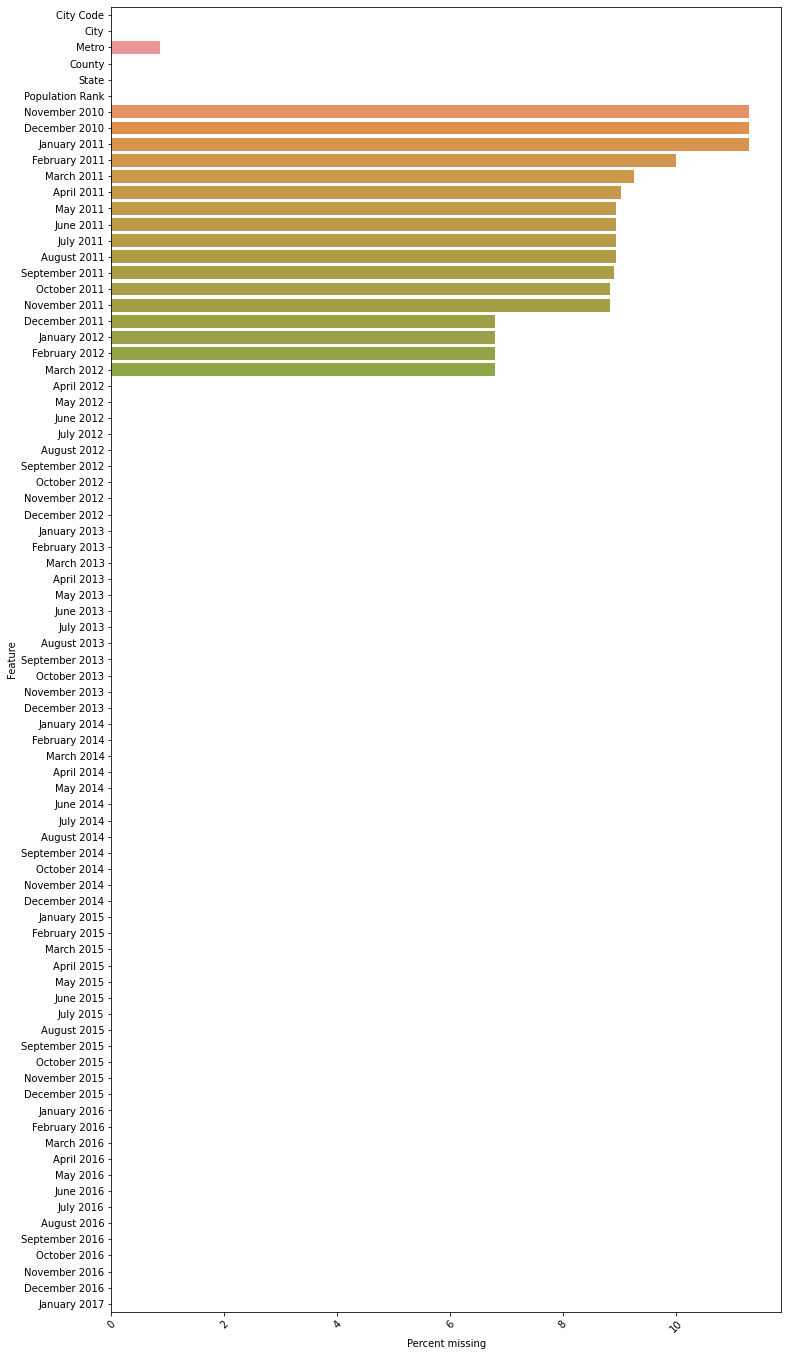

In [27]:
#See how many null values in the dataset by using a bar chart
#If a column has more than 60% null values, we will drop it
#But the bar chart shows that no column has more than 10% of null values, therefore we will no drop any columns
null_vals = price_df2.isnull().sum()/len(price_df2)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (12,24))
plt.xticks(rotation=45)
sns.barplot(x = "Percent missing",y ="Feature",data = null_vals,orient = "h")

In [28]:
# define data convert functions, impute the null value with median

def mydf_to_nums(my_df, feature, null_status):
    if not is_numeric_dtype(feature):
        my_df[null_status] = feature.cat.codes + 1
        
def mydf_imputer(my_df, feature, null_status, null_table):
    if is_numeric_dtype(feature):
        if pd.isnull(feature).sum() or (null_status in null_table):
            # my_df[null_status+'_na'] = pd.isnull(feature)
            filler = null_table[null_status] if null_status in null_table else feature.median()
            my_df[null_status] = feature.fillna(filler)
            null_table[null_status] = filler
    return null_table   

def mydf_preprocessor(my_df, null_table):
    '''null_table  = your table or None'''
    
    if null_table is None: 
        null_table = dict()
    for p,q in my_df.items(): 
        null_table = mydf_imputer(my_df, q, p, null_table)
    for p,q in my_df.items(): 
        mydf_to_nums(my_df, q, p)
    my_df = pd.get_dummies(my_df, dummy_na = True)
    res = [my_df, null_table]
    return res

In [29]:
def str_to_cat(my_df):
    for p,q in my_df.items(): #my_df.items() is a generator in Python
        if is_string_dtype(q): 
            my_df[p] = q.astype('category').cat.as_ordered()
    return my_df

price_df3 = str_to_cat(price_df2)

In [30]:
# Filled the null values in dataset
price_df4, my_table=mydf_preprocessor(price_df3,null_table = None)
price_df4

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,6181,1527,354,549,35,1,1297.0,1300.0,1307.0,1303.0,...,2334,2339,2345,2344,2336,2324,2318,2321,2321,2322
1,12447,1254,290,396,5,2,2184.0,2184.0,2183.0,2188.0,...,2637,2662,2687,2704,2716,2723,2731,2740,2748,2753
2,17426,374,95,153,15,3,1563.0,1555.0,1547.0,1537.0,...,1684,1686,1687,1685,1681,1675,1668,1656,1644,1632
3,39051,1014,236,285,44,4,1198.0,1199.0,1199.0,1200.0,...,1444,1446,1446,1443,1440,1438,1437,1437,1435,1430
4,13271,1746,391,521,39,5,1092.0,1099.0,1094.0,1087.0,...,1206,1211,1218,1222,1223,1220,1216,1211,1209,1212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,42766,1870,0,494,49,2996,844.0,844.0,857.0,867.0,...,1042,1036,1025,1005,989,984,977,975,976,984
2996,398578,2276,58,652,31,2997,1727.0,1723.0,1721.0,1728.0,...,2189,2160,2123,2086,2068,2078,2126,2187,2231,2249
2997,20307,1952,274,138,23,2998,1297.0,1300.0,1307.0,1303.0,...,1111,1108,1103,1095,1087,1087,1101,1128,1152,1161
2998,53876,1747,12,711,32,2999,1527.0,1519.0,1503.0,1477.0,...,1071,1104,1125,1147,1161,1178,1192,1204,1205,1200


In [31]:
# Define functions for output metrics

# def cross_val(model):
    #pred = cross_val_score(model, X, y, cv=10)
    # return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [32]:
price_df4.describe()

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
count,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000
mean,58227.826333,1279.102000,281.71400,383.881667,23.912333,1500.500000,1429.387667,1433.389333,1436.291333,1435.026333,...,1646.099667,1652.007000,1655.788667,1656.225000,1654.890333,1653.681000,1654.98500,1658.127333,1659.897333,1660.759333
std,98829.503366,750.425281,162.41715,206.015661,14.626481,866.169729,549.411892,551.519652,552.506661,554.854549,...,762.706406,768.368193,774.100218,778.481892,781.137728,781.768973,781.50947,782.123709,780.963151,780.284470
min,3310.000000,1.000000,0.00000,1.000000,1.000000,1.000000,552.000000,551.000000,548.000000,542.000000,...,558.000000,558.000000,555.000000,551.000000,547.000000,546.000000,546.00000,543.000000,544.000000,549.000000
25%,16839.750000,629.750000,123.00000,216.000000,10.000000,750.750000,1090.000000,1093.750000,1096.000000,1088.000000,...,1161.750000,1165.000000,1163.000000,1157.750000,1152.000000,1151.000000,1151.75000,1156.000000,1158.750000,1159.000000
50%,31680.000000,1272.500000,309.00000,396.000000,23.000000,1500.500000,1297.000000,1300.000000,1307.000000,1303.000000,...,1458.000000,1462.500000,1462.500000,1462.500000,1462.500000,1464.000000,1469.00000,1472.500000,1471.500000,1475.000000
75%,46504.250000,1921.250000,415.00000,545.000000,36.000000,2250.250000,1641.000000,1646.000000,1644.250000,1643.250000,...,1952.250000,1958.250000,1965.250000,1971.000000,1967.500000,1970.000000,1976.25000,1983.000000,1981.000000,1979.000000
max,737791.000000,2605.000000,567.00000,759.000000,51.000000,3000.000000,6874.000000,6905.000000,6949.000000,6980.000000,...,8331.000000,8498.000000,8614.000000,8689.000000,8735.000000,8733.000000,8707.00000,8732.000000,8734.000000,8784.000000


# 2-2. Making prediction using different model

In order to find out the model that can predict most accuratly. We want to try KNN, Random Forest Model, DNN. Then, we find out that both Random Forest and DNN model give us most correct prediction for price.csv. 

For our project, we are using train, valid, test datasets. We are using train datasets to train the model, and valid dataset to tune the hyper-parameter if needed. We will use test dataset to make a prediction.

In [33]:
#Let the y_value be "January 2017", and use other colunms to predict it
x=price_df4.drop("January 2017",axis=1)
y=price_df4["January 2017"]

In [34]:
#split the x, y into x_test, y_test, x_valid, y_valid, x_train, and y_train
# Train-Validation- Test Split
#Using train_test_split twice to get the Train-val-test-split
(x_trn, x_tst, y_trn, y_tst) = train_test_split(x, y, test_size=0.2, random_state=1)
(x_trn,x_val,y_trn,y_val) = train_test_split(x_trn, y_trn, test_size=0.25, random_state=1)
print(x_trn.shape,x_tst.shape,x_val.shape,y_trn.shape,y_tst.shape,y_val.shape)

(1800, 80) (600, 80) (600, 80) (1800,) (600,) (600,)


### KNN Model

In [35]:
#Using gridsearch to predict and it turns out the accuracy rate is very low. 
#Therefore the gridsearch will not be helpful to predict the price of rent in next month

grid_params={
    'n_neighbors':[18,100,180,200],
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan']
}

gs=GridSearchCV(KNeighborsRegressor(),grid_params)

gs_results=gs.fit(x_trn,y_trn)
y_pred_gs=gs_results.predict(x_tst)

print_evaluate(y_tst, y_pred_gs)


MAE: 90.81193282883397
MSE: 36128.06414723678
RMSE: 190.07383867128263
R2 Square 0.9471465855869186


In [36]:
results_df = pd.DataFrame(data=[["KNN Model", *evaluate(y_tst, y_pred_gs)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,KNN Model,90.811933,36128.064147,190.073839,0.947147


### Random Forest Model

In [37]:
# Tuning 
mod_rf1 = RandomForestRegressor(n_jobs = -1, n_estimators = 5,
                                 bootstrap = True)
mod_rf1.fit(x_trn,y_trn)
y_rf1 = mod_rf1.predict(x_val)
print_evaluate(y_val,y_rf1)

MAE: 18.467999999999993
MSE: 8359.596533333332
RMSE: 91.43082922807456
R2 Square 0.9873856802426076


In [38]:
# Tuning 
mod_rf2 = RandomForestRegressor(n_jobs = -1, n_estimators = 10,
                                 bootstrap = True)
mod_rf2.fit(x_trn,y_trn)
y_rf2 = mod_rf2.predict(x_val)
print_evaluate(y_val,y_rf2)

MAE: 17.88050000000001
MSE: 7027.2284833333315
RMSE: 83.82856603409921
R2 Square 0.9893961739967281


In [39]:
# Tuning 
mod_rf3 = RandomForestRegressor(n_jobs = -1, n_estimators = 100,
                                 bootstrap = True)
mod_rf3.fit(x_trn,y_trn)
y_rf3 = mod_rf3.predict(x_val)
print_evaluate(y_val,y_rf3)

MAE: 16.918349999999997
MSE: 7363.1596765
RMSE: 85.8088554666708
R2 Square 0.988889266340337


In [40]:
# Using Random Forest to predict the model with n_estimators = 10
model_rf = RandomForestRegressor(n_jobs = -1, n_estimators = 10,
                               bootstrap = True)
model_rf.fit(x_trn,y_trn)


# predict the testing dataset

y_pred_tst = model_rf.predict(x_tst)

print_evaluate(y_tst, y_pred_tst)

MAE: 18.96
MSE: 6574.605800000002
RMSE: 81.08394292336801
R2 Square 0.9903817053818914


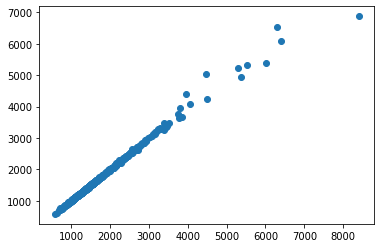

In [41]:
plt.scatter(y_tst, y_pred_tst)

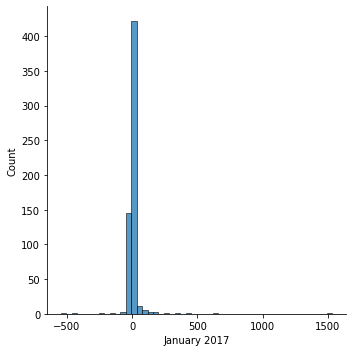

In [42]:
sns.displot((y_tst - y_pred_tst), bins=50);

In [43]:
results_df_2 = pd.DataFrame(data=[["Random Forest", *evaluate(y_tst, y_pred_tst)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,KNN Model,90.811933,36128.064147,190.073839,0.947147
1,Random Forest,18.960000,6574.605800,81.083943,0.990382


### DNN Model

In [44]:
#USING DNN model
#First let y be January 2017 the last colunm
#and let x be the rest of columns.
X = price_df3.iloc[:, :80]
Y = price_df3.iloc[:, 80:81]

In [45]:
# Train- Test Split
# Train-Validation- Test Split
#Using train_test_split twice to get the Train-val-test-split
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.2, random_state=1)
(X_train,X_val,Y_train,Y_val) = train_test_split(X_train, Y_train, test_size=0.25, random_state=1)
print(X_train.shape,X_test.shape,X_val.shape,Y_train.shape,Y_test.shape,Y_val.shape)

(1800, 80) (600, 80) (600, 80) (1800, 1) (600, 1) (600, 1)


In [46]:
# build DNN model
def buildDNN():
    model = Sequential()
    model.add(Dense(X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

model_dnn = buildDNN();

In [47]:
# Fit the DNN with train data and valid data
#Because the train data has 1800 rows, thus we let epochs=10,  batch_size=180

history=model_dnn.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100,  batch_size=18)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

100/100 [==============================] - 0s 4ms/step - loss: 352580.1562 - val_loss: 16330.0566
Epoch 2/100
100/100 [==============================] - 0s 2ms/step - loss: 28257.2363 - val_loss: 13601.1270
Epoch 3/100
100/100 [==============================] - 0s 2ms/step - loss: 15330.7988 - val_loss: 27783.0176
Epoch 4/100
100/100 [==============================] - 0s 2ms/step - loss: 12716.4814 - val_loss: 11433.0928
Epoch 5/100
100/100 [==============================] - 0s 3ms/step - lo

100/100 [==============================] - 0s 2ms/step - loss: 3459.3562 - val_loss: 4849.8364
Epoch 71/100
100/100 [==============================] - 0s 2ms/step - loss: 2722.8831 - val_loss: 2156.5830
Epoch 72/100
100/100 [==============================] - 0s 2ms/step - loss: 5752.2837 - val_loss: 3207.6387
Epoch 73/100
100/100 [==============================] - 0s 2ms/step - loss: 3137.3872 - val_loss: 3478.8362
Epoch 74/100
100/100 [==============================] - 0s 2ms/step - loss: 3443.2678 - val_loss: 3286.5813
Epoch 75/100
100/100 [==============================] - 0s 2ms/step - loss: 4843.1655 - val_loss: 5279.9229
Epoch 76/100
100/100 [==============================] - 0s 2ms/step - loss: 6141.6558 - val_loss: 40225.4414
Epoch 77/100
100/100 [==============================] - 0s 2ms/step - loss: 6158.7290 - val_loss: 2444.8430
Epoch 78/100
100/100 [==============================] - 0s 2ms/step - loss: 2833.7441 - val_loss: 4685.0200
Epoch 79/100
100/100 [==================

In [48]:
y_pred_dnn = model_dnn.predict(X_test);

In [49]:
# y_pred_dnn

In [50]:
print_evaluate(Y_test, y_pred_dnn)

MAE: 29.87511942545573
MSE: 2133.7132487229132
RMSE: 46.19213405681657
R2 Square 0.9968784922958


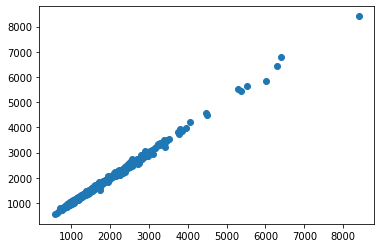

In [51]:
plt.scatter(Y_test, y_pred_dnn)

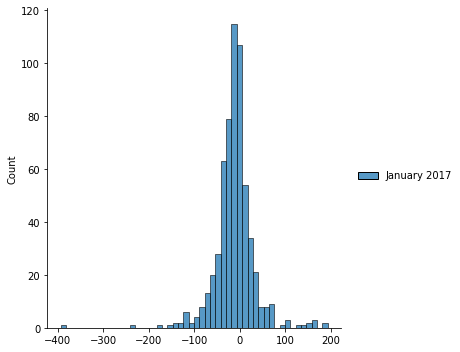

In [52]:
sns.displot((Y_test - y_pred_dnn), bins=50);

In [53]:
results_df_2 = pd.DataFrame(data=[["DNN Model", *evaluate(Y_test, y_pred_dnn)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,KNN Model,90.811933,36128.064147,190.073839,0.947147
1,Random Forest,18.960000,6574.605800,81.083943,0.990382
2,DNN Model,29.875119,2133.713249,46.192134,0.996878


<AxesSubplot:ylabel='Model'>

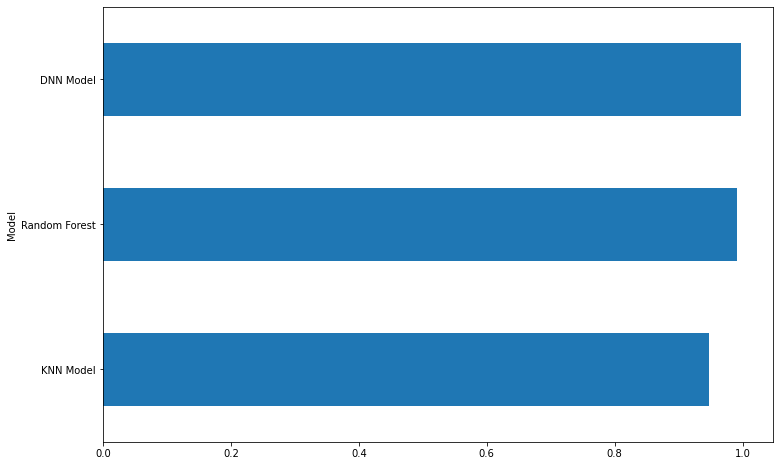

In [54]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))

# Section 3. Prediction for PricePerSqft of 2017

## 3-1. Prepocessing pricepersqft.csv dataset

Now that we make our prediction for price.csv. Let's preprocessing pricepersqft.csv

In [55]:
#Read the data first
pr_df=pd.read_csv('./pricepersqft.csv')
print(pr_df.shape)
pr_df.head(2)

(11919, 81)


,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,6181,New York,New York,Queens,NY,1,NaN,NaN,NaN,NaN,...,1.806,1.810,1.816,1.824,1.828,1.836,1.844,1.858,1.866,1.872
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,1.578,1.578,1.58,1.582,...,1.990,2.004,2.018,2.026,2.032,2.038,2.042,2.048,2.056,2.064


In [56]:
#Split the data, because the data is too large we are only use 3000 rows for testing and prediction
pr_df2,pr_df_noinused=mydf_splitter(pr_df,3000)

<AxesSubplot:xlabel='Percent missing', ylabel='Feature'>

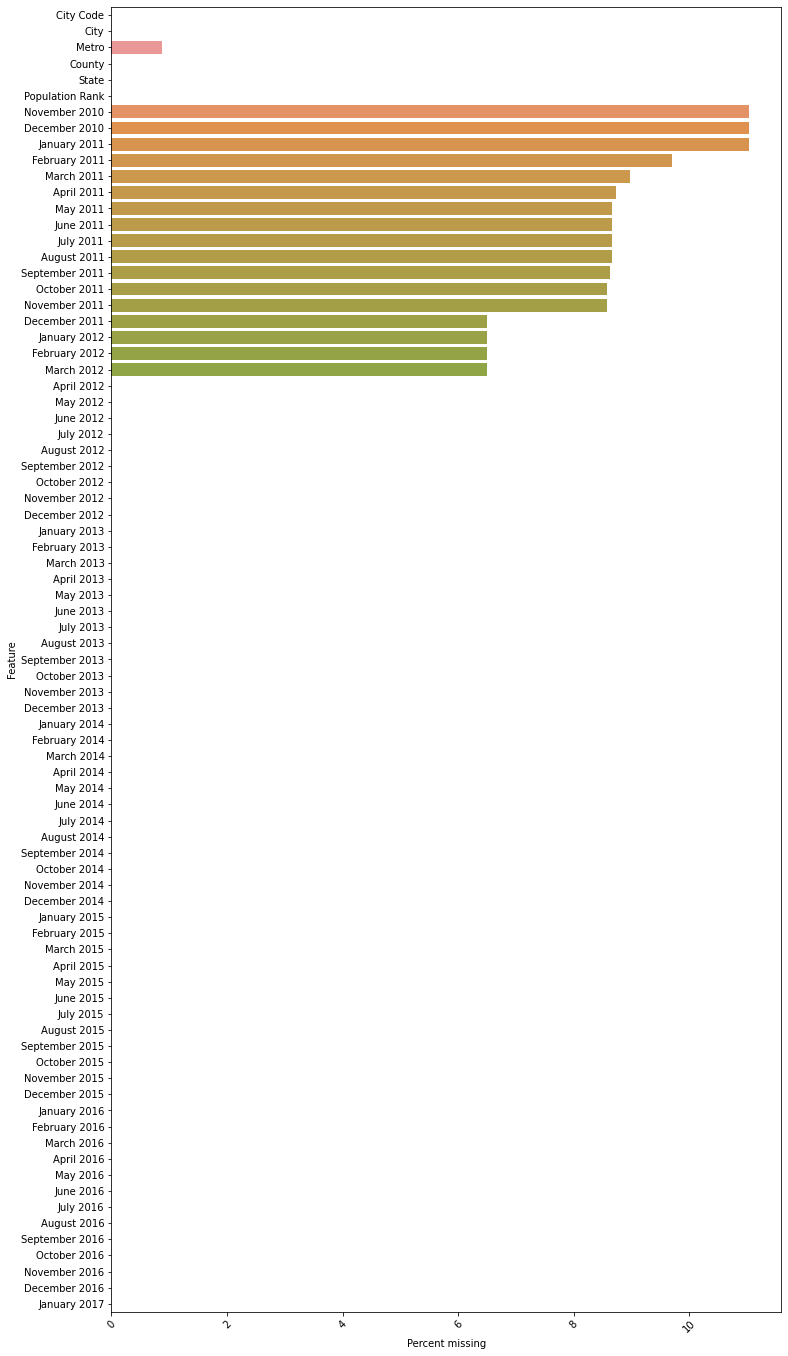

In [57]:
#See how many null values in the dataset by using a bar chart
#If a column has more than 60% null values, we will drop it
#But the bar chart shows that no column has more than 10% of null values, therefore we will no drop any columns

null_vals = pr_df2.isnull().sum()/len(pr_df2)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (12,24))
plt.xticks(rotation=45)
sns.barplot(x = "Percent missing",y ="Feature",data = null_vals,orient = "h")

In [58]:
#Next, convert object types and string types to category type
pr_df3 = str_to_cat(pr_df2)

In [59]:
# Filled the null values in dataset
pr_df4, pr_df_my_table=mydf_preprocessor(pr_df3,null_table = None)
pr_df4

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,6181,1524,347,538,35,1,0.850,0.852,0.852,0.854,...,1.806,1.810,1.816,1.824,1.828,1.836,1.844,1.858,1.866,1.872
1,12447,1251,285,385,5,2,1.578,1.578,1.580,1.582,...,1.990,2.004,2.018,2.026,2.032,2.038,2.042,2.048,2.056,2.064
2,17426,372,92,146,15,3,1.244,1.248,1.254,1.254,...,1.354,1.362,1.370,1.374,1.378,1.380,1.380,1.380,1.376,1.374
3,39051,1014,231,277,44,4,0.788,0.784,0.784,0.786,...,0.984,0.984,0.982,0.980,0.976,0.974,0.974,0.976,0.976,0.974
4,13271,1748,383,511,39,5,0.854,0.858,0.858,0.858,...,0.948,0.956,0.962,0.964,0.964,0.966,0.968,0.972,0.974,0.974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,17609,478,309,660,43,2996,0.614,0.616,0.616,0.614,...,0.642,0.648,0.650,0.648,0.646,0.644,0.642,0.636,0.630,0.624
2996,33300,1666,434,440,5,2997,1.952,1.928,1.868,1.792,...,2.102,2.126,2.148,2.162,2.166,2.168,2.170,2.172,2.184,2.198
2997,39048,1012,281,582,3,2998,0.638,0.642,0.640,0.636,...,0.646,0.640,0.636,0.638,0.644,0.650,0.658,0.662,0.660,0.656
2998,18124,735,95,53,18,2999,0.738,0.742,0.744,0.744,...,0.848,0.850,0.850,0.852,0.852,0.850,0.850,0.844,0.840,0.838


## 3-2 Using different models to make a prediction

For pricepersqft.csv, we will try different models to find out which is the best models to make the most correct prediction. 

In [60]:
#Let the y_value be "January 2017", and use other colunms to predict it
X_sqft = pr_df3.iloc[:, :80]
Y_sqft = pr_df3.iloc[:, 80:81]

In [61]:
# Train- Test Split
# Train-Validation- Test Split
#Using train_test_split twice to get the Train-val-test-split
(X_train_sqft, X_test_sqft, Y_train_sqft, Y_test_sqft) = train_test_split(X_sqft, Y_sqft, test_size=0.2, random_state=1)
(X_train_sqft,X_val_sqft,Y_train_sqft,Y_val_sqft) = train_test_split(X_train_sqft, Y_train_sqft, test_size=0.25, random_state=1)
print(X_train_sqft.shape,X_test_sqft.shape,X_val_sqft.shape,Y_train_sqft.shape,Y_test_sqft.shape,Y_val_sqft.shape)

(1800, 80) (600, 80) (600, 80) (1800, 1) (600, 1) (600, 1)


### Linear Regression Model

In [62]:
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_sqft,Y_train_sqft)

LinearRegression(normalize=True)

In [63]:
y_pred_lin = lin_reg.predict(X_test_sqft)

In [64]:
print_evaluate(Y_test_sqft, y_pred_lin)

MAE: 0.0017914348972364554
MSE: 5.723604861189727e-06
RMSE: 0.002392405664010543
R2 Square 0.9999704079706933


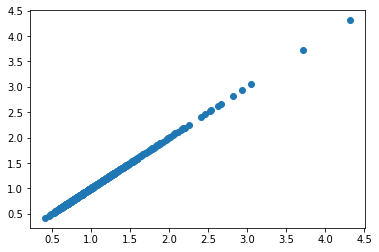

In [65]:
plt.scatter(Y_test_sqft, y_pred_lin)

## Random Forest Model

In [66]:
rf_reg = RandomForestRegressor(n_estimators=100)

rf_reg.fit(X_train_sqft, Y_train_sqft.values.ravel())

RandomForestRegressor()

In [67]:
y_pred_rf_reg = rf_reg.predict(X_test_sqft)
# print_evaluate(Y_test_sqft, y_pref_rf_reg)
# y_pred_rf_reg
print_evaluate(Y_test_sqft, y_pred_rf_reg)

MAE: 0.007524033333333339
MSE: 0.0007590119006666654
RMSE: 0.027550170610481987
R2 Square 0.9960757769005043


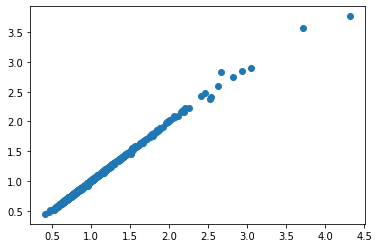

In [68]:
plt.scatter(Y_test_sqft, y_pred_rf_reg)

### DNN Model

In [69]:
# Build the deep neural network

model_sqft = buildDNN()

In [70]:
# Fit the DNN with train data
tf.keras.backend.set_floatx('float64')
history_sqft=model_sqft.fit(X_train_sqft, Y_train_sqft, validation_data=(X_val_sqft, Y_val_sqft), epochs=10,  batch_size=5)

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

360/360 [==============================] - 1s 3ms/step - loss: 108774.1719 - val_loss: 6.0042
Epoch 2/10
360/360 [==============================] - 1s 3ms/step - loss: 422.5670 - val_loss: 8.0027
Epoch 3/10
360/360 [==============================] - 1s 2ms/step - loss: 22646.5977 - val_loss: 135.4297
Epoch 4/10
360/360 [==============================] - 1s 3ms/step - loss: 11.6445 - val_loss: 0.8216
Epoch 5/10
360/360 [==============================] - 1s 2ms/step - loss: 0.9197 - val_loss: 1

In [71]:
#Make a prediction using DNN model
y_pred_sqft_dnn=model_sqft.predict(X_test_sqft)

In [72]:
# evaluate the model
print_evaluate(Y_test_sqft, y_pred_sqft_dnn)

MAE: 0.808121601397718
MSE: 1.2377754631540492
RMSE: 1.1125535776554984
R2 Square -5.3995137101695425


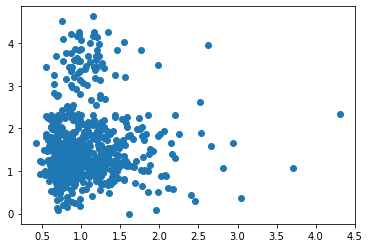

In [73]:
plt.scatter(Y_test_sqft, y_pred_sqft_dnn)

DNN Model has a worst prediction for price sqft dataset, this problem may caused by the float input.